# Ordovician reconstructions of arcs, sutures, and temperatures

## Load functions and files

In [1]:
import geopandas as gpd
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import matplotlib.lines as mlines
from matplotlib.lines import Line2D
from matplotlib.font_manager import FontProperties
import pmagpy.ipmag as ipmag
import pmagpy.pmag as pmag
import pandas as pd
pd.set_option('display.max_rows', None)
import numpy as np
import os
%matplotlib inline

### `pygplates` import

In [2]:
import sys
# Replace this with the path to your package
package_path = '/Applications/pygplates_0.36.0_py39_Darwin-x86_64'

# Append the directory to sys.path
if package_path not in sys.path:
    sys.path.append(package_path)
import pygplates

## Data file import

In [3]:
ceed_land_path = '../data/paleogeography/blocks/CEED6_LAND.shp'
ceed_poly_path = '../data/paleogeography/blocks/CEED6_POLY.shp'
rot_path = '../data/paleogeography/models/Torsvik_Cocks_HybridRotationFile.rot'

ceed_modified_land_path = '../data/paleogeography/blocks/CEED6-modified.shp'
modified_rot_path = '../data/paleogeography/models/TC2017-SHM2017-D2018-extended.rot'
modified_rot_path_ice_centroid = '../data/paleogeography/models/TC2017-SHM2017-D2018-extended_ice_centroid.rot'

## Make folder for temporary reconstruction output

The code requires generating reconstructions of shapefiles that are then read in as geopandas dataframe. This code checks for such a folder and makes it if it isn't already there.

In [4]:
output_folder = 'temp_reconstructions'

if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    print(f"Folder '{output_folder}' created.")
else:
    print(f"Folder '{output_folder}' already exists.")

Folder 'temp_reconstructions' already exists.


## Define a function for making map axes

In [5]:
def make_map(projection, central_longitude=0, central_latitude=0, figsize=(6, 6),
             grid_lines=True,
             lat_grid=[-180., -150., -120.,  -90.,  -60.,  -30.,
                       0.,   30.,   60., 90.,  120.,  150.,  180.],
             lon_grid=[-180., -150., -120.,  -90.,  -60.,  -30.,    0.,   30.,   60., 90.,  120.,  150.,  180.],
             label_latitudes=False):

    fig = plt.figure(figsize=figsize)
    
    # Try to create the projection with both central_longitude and central_latitude
    try:
        map_projection = projection(central_longitude=central_longitude, central_latitude=central_latitude)
    except TypeError:
        # If that fails, try again with only central_longitude
        map_projection = projection(central_longitude=central_longitude)
    
    ax = plt.axes(projection=map_projection)
    ax.set_global()
    if grid_lines == True:
        ax.gridlines(xlocs=lon_grid, ylocs=lat_grid, linewidth=1,
                     color='black', linestyle='dotted')
    return fig, ax, map_projection

## Define paths to paleogeography features

In [6]:
land_color = 'wheat'
water_color = '#f0f8ff'

basins_path = '../data/paleogeography/features/Hirnantian_Glacial_Basins.shp'
glaciomarine_color = '#1f78b4'
grounded_ice_color = '#a6cee3' 
unconformity_color = '#c3c1c1'
basin_colors = {'M': glaciomarine_color, 'G': grounded_ice_color, 'U': unconformity_color}

highlands_path = '../data/paleogeography/features/Gondwana_highlands.shp'
highlands_color = 'tan'

arcs_path = '../data/paleogeography/features/OrdovicianArcs.shp'
arcs_color = '#e38074'

sutures_path = '../data/paleogeography/features/OrdovicianSutures.shp'
sutures_color = '#808000'

ophiolites_path = '../data/paleogeography/features/Ordovician_ophiolites.shp'
ophiolites_color = '#B4C424'

small_ice_path = '../data/paleogeography/features/ice_sheet_small.shp'
large_ice_path = '../data/paleogeography/features/ice_sheet_max.shp'
ice_sheet_color = '#E0FFFF'

lat_grid=[-80,-60,-40,-20,0]

## Plot modified paleogeography with other features

These plots use the modified `TC2017-SHM2017-D2018-extended.rot` rotation file.

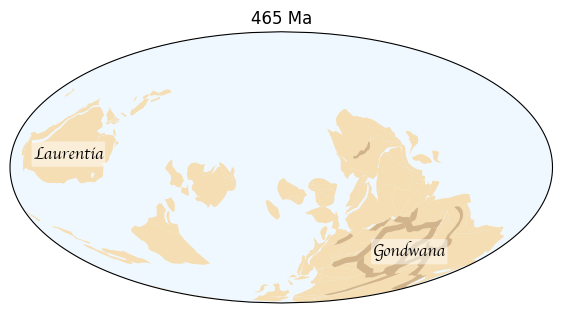

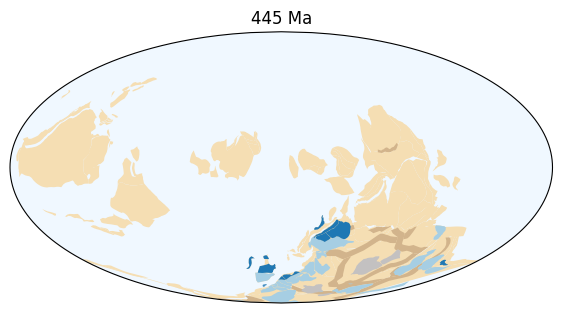

In [7]:
map_fig, map_axis, proj_plot = make_map(ccrs.Mollweide, figsize=(7, 6), grid_lines=False)

t = 465

ceed_modified_land_reconstruction = output_folder + '/land-modified-' + str(t) + '.shp'
pygplates.reconstruct(ceed_modified_land_path, modified_rot_path, ceed_modified_land_reconstruction, t, 1)
paleogeo_land = gpd.read_file(ceed_modified_land_reconstruction)
paleogeo_land = paleogeo_land.to_crs(proj_plot)

highlands_reconstruction = output_folder + '/highlands.shp'
pygplates.reconstruct(highlands_path, modified_rot_path, highlands_reconstruction, t, 1)
highlands = gpd.read_file(highlands_reconstruction)
highlands = highlands.to_crs(proj_plot)

paleogeo_land.plot(ax=map_axis, linewidth=1, facecolor=land_color, edgecolor=None)
highlands.plot(ax=map_axis, linewidth=1, color=highlands_color, edgecolor=None)
map_axis.set_facecolor(water_color)

map_axis.text(80, -50, 'Gondwana', transform=ccrs.Geodetic(), fontproperties=FontProperties(family='cursive', size=12), 
              bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle="round,pad=0.1"))
map_axis.text(-165, 5, 'Laurentia', transform=ccrs.Geodetic(), fontproperties=FontProperties(family='cursive', size=12), 
              bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle="round,pad=0.1"))

map_axis.set_title(f'{t} Ma')
plt.savefig('../Figures/paleogeo_' + str(t) + '_mollweide.pdf', bbox_inches='tight', transparent=True)
plt.show()

map_fig, map_axis, proj_plot = make_map(ccrs.Mollweide, figsize=(7, 6), grid_lines=False)

t = 445

ceed_modified_land_reconstruction = output_folder + '/land-modified-' + str(t) + '.shp'
pygplates.reconstruct(ceed_modified_land_path, modified_rot_path, ceed_modified_land_reconstruction, t, 1)
paleogeo_land = gpd.read_file(ceed_modified_land_reconstruction)
paleogeo_land = paleogeo_land.to_crs(proj_plot)

basins_reconstruction = output_folder + '/basins.shp'
pygplates.reconstruct(basins_path, modified_rot_path, basins_reconstruction, t, 1)
basins = gpd.read_file(basins_reconstruction)
basins = basins.to_crs(proj_plot)
basins['color'] = basins['IceContact'].map(basin_colors)

highlands_reconstruction = output_folder + '/highlands.shp'
pygplates.reconstruct(highlands_path, modified_rot_path, highlands_reconstruction, t, 1)
highlands = gpd.read_file(highlands_reconstruction)
highlands = highlands.to_crs(proj_plot)

paleogeo_land.plot(ax=map_axis, linewidth=1, facecolor=land_color, edgecolor=None)
highlands.plot(ax=map_axis, linewidth=1, color=highlands_color, edgecolor=None)
basins.plot(ax=map_axis, linewidth=1, color=basins['color'], edgecolor=None)
map_axis.set_facecolor('#f0f8ff')

map_axis.set_title(f'{t} Ma')
plt.savefig('../Figures/paleogeo_' + str(t) + '_mollweide.pdf', bbox_inches='tight', transparent=True)
plt.show()

### Plot sutures, arcs, and ophiolites


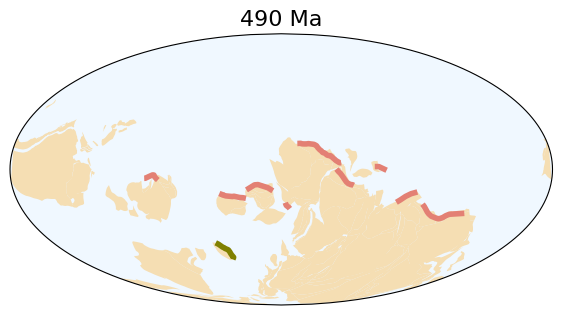

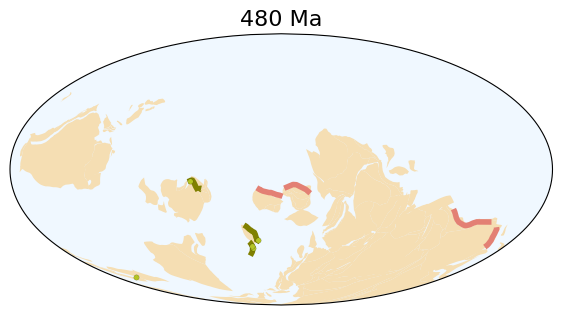

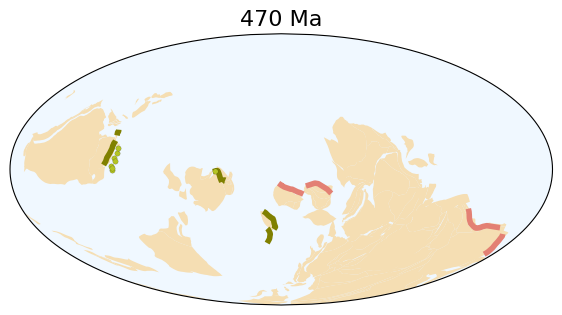

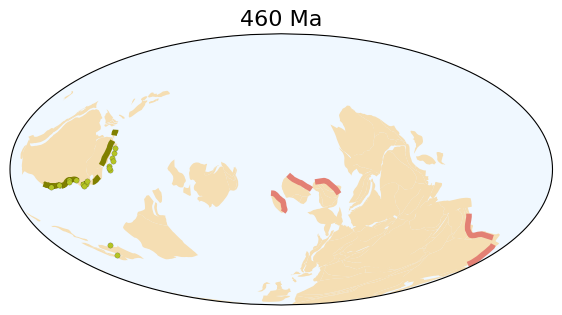

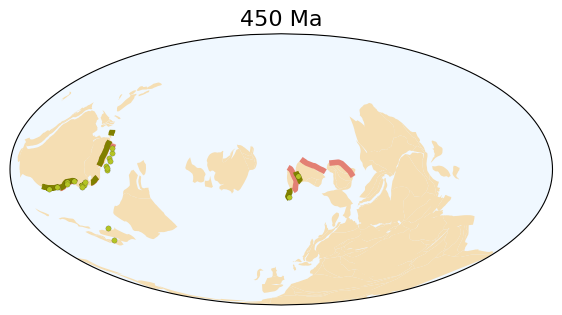

In [8]:
def make_arc_suture_map(t, plot_ophiolites=False, plot_legend=True):
    map_fig, map_axis, proj_plot = make_map(ccrs.Mollweide, figsize=(7, 6), grid_lines=False)

    ceed_modified_land_reconstruction = output_folder + '/land-modified-' + str(t) + '.shp'
    pygplates.reconstruct(ceed_modified_land_path, modified_rot_path, ceed_modified_land_reconstruction, t, 1)
    paleogeo_land = gpd.read_file(ceed_modified_land_reconstruction)
    paleogeo_land = paleogeo_land.to_crs(proj_plot)

    highlands_reconstruction = output_folder + '/highlands.shp'
    pygplates.reconstruct(highlands_path, modified_rot_path, highlands_reconstruction, t, 1)
    highlands = gpd.read_file(highlands_reconstruction)
    highlands = highlands.to_crs(proj_plot)

    arcs_reconstruction = output_folder + '/arcs.shp'
    pygplates.reconstruct(arcs_path, modified_rot_path, arcs_reconstruction, t, 1)
    arcs = gpd.read_file(arcs_reconstruction)
    arcs = arcs.to_crs(proj_plot)

    sutures_reconstruction = output_folder + '/sutures.shp'
    pygplates.reconstruct(sutures_path, modified_rot_path, sutures_reconstruction, t, 1)
    sutures = gpd.read_file(sutures_reconstruction)
    sutures = sutures.to_crs(proj_plot)

    paleogeo_land.plot(ax=map_axis, linewidth=1, facecolor=land_color, edgecolor=None)
    # highlands.plot(ax=map_axis, linewidth=1, color=highlands_color, edgecolor=None)
    arcs.plot(ax=map_axis, linewidth=4, color=arcs_color, edgecolor=arcs_color)
    sutures.plot(ax=map_axis, linewidth=4, color=sutures_color, edgecolor=sutures_color)
    
    if plot_ophiolites:
        ophiolites_reconstruction = output_folder + '/ophiolites.shp'
        pygplates.reconstruct(ophiolites_path, modified_rot_path, ophiolites_reconstruction, t, 1)
        ophiolites = gpd.read_file(ophiolites_reconstruction)
        ophiolites = ophiolites.to_crs(proj_plot)

        ophiolites['Suture_Int'] = ophiolites['Suture'].apply(lambda x: int(x) if pd.notna(x) else pd.NA)
        ophiolites['Suture_Int'] = ophiolites['Suture_Int'].astype('Int64')
        sutures['ID_int'] = sutures['ID'].astype(int)
        sutures_filtered = sutures[(sutures['EXMAX']>t) & (sutures['EXMIN']<t)]

        ophiolites_filtered = ophiolites[ophiolites['Suture_Int'].isin(sutures_filtered['ID_int'])]
        ophiolites_filtered.plot(ax=map_axis, linewidth=0.1, markersize=15, color=ophiolites_color, 
                                edgecolor='black', zorder=100)    
    map_axis.set_facecolor(water_color)

    map_axis.set_title(f'{t} Ma', fontsize=16)
    plt.show()

for t in range(490, 440, -10):
    make_arc_suture_map(t,plot_ophiolites=True)

## Average and plot temperature data

In [9]:
all_conodont = pd.read_csv('../data/geochemistry/apatite_all_ord.csv')
all_conodont.head(1)

,age,sample,meter,d18O,T_le,T_pu,type,min,period,stage,conzone,chizone,country,state,lat,long,source
0,420.0,CZ 462,NaN,17.64,32.62,35.3952,Conodont,apatite,Silurian,Pridoli,NaN,NaN,Czech Republic,Pozary,50.07,13.9,Joachimski_2009; Grossman_2022


In [10]:
def age_slice(dataframe,age_range_max,age_range_min):
    return dataframe[(dataframe['age']<age_range_max) & (dataframe['age']>=age_range_min)]

all_conodont_495_445 = age_slice(all_conodont,495,445)
all_conodont_495_445['country'].unique()

array(['Canada', 'USA', 'Argentina', 'Australia', 'Sweden', 'South China',
       'China', 'Estonia', 'Poland'], dtype=object)

In [11]:
# Function to filter the dataframe based on age range
def age_slice(dataframe, age_range_max, age_range_min):
    return dataframe[(dataframe['age'] < age_range_max) & (dataframe['age'] >= age_range_min)]

ages = [490, 480, 470, 460, 450]
age_ranges = [(age + 5, age - 5) for age in ages]

# Group the countries as needed
country_groups = {
    'Canada+USA': ['Canada', 'USA'],
    'Argentina': ['Argentina'],
    'Australia': ['Australia'],
    'South China': ['South China'],
    'Baltica': ['Sweden', 'Estonia', 'Poland']
}

# Bootstrap function to calculate confidence intervals
def bootstrap_mean_confidence_interval(data, n_bootstrap=1000, ci_percentiles=(2.5, 97.5)):
    # Generate bootstrap samples
    bootstrap_means = np.empty(n_bootstrap)
    for i in range(n_bootstrap):
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_means[i] = np.mean(bootstrap_sample)
    
    # Calculate the confidence interval percentiles
    lower_bound = np.percentile(bootstrap_means, ci_percentiles[0])
    upper_bound = np.percentile(bootstrap_means, ci_percentiles[1])
    
    # Return mean, lower and upper bounds of confidence interval
    return np.mean(data), lower_bound, upper_bound

# Initialize lists to store the data
all_groups = []
all_mean_values = []
all_lower_ci = []
all_upper_ci = []
all_counts = []
all_centroid_lons = []
all_centroid_lats = []
all_min_ages = []
all_max_ages = []
all_ages = []
all_age_ranges = []

# Process each age range
for age_range_max, age_range_min in age_ranges:
    # Filter the dataframe for the current age range
    current_df = age_slice(all_conodont, age_range_max, age_range_min)
    
    # Calculate the mean, count, and centroids for each group
    for group, countries in country_groups.items():
        filtered_df = current_df[current_df['country'].isin(countries)]
        mean_value, lower_ci, upper_ci = bootstrap_mean_confidence_interval(filtered_df['T_le'].values)
        count = filtered_df.shape[0]
        
        if count > 2 and filtered_df['long'].isna().any() == False:
            mean_lon_lat = ipmag.fisher_mean(filtered_df['long'].tolist(), filtered_df['lat'].tolist())
            centroid_lon = mean_lon_lat['dec']
            centroid_lat = mean_lon_lat['inc']
            all_centroid_lons.append(centroid_lon)
            all_centroid_lats.append(centroid_lat)
        elif group == 'South China':
            all_centroid_lons.append(111.3)
            all_centroid_lats.append(30.7)
        else:
            all_centroid_lons.append(np.nan)
            all_centroid_lats.append(np.nan)

        all_groups.append(group)
        all_mean_values.append(mean_value)
        all_lower_ci.append(lower_ci)
        all_upper_ci.append(upper_ci)
        all_counts.append(count)
        all_min_ages.append(age_range_min)
        all_max_ages.append(age_range_max)
        all_ages.append((age_range_max+age_range_min)/2)
        all_age_ranges.append(f"{age_range_min}-{age_range_max}")

# Create a DataFrame with the results
results_df = pd.DataFrame({
    'Group': all_groups,
    'Mean Temperature': all_mean_values,
    'Temperature lower CI': all_lower_ci,
    'Temperature upper CI': all_upper_ci,
    'Count': all_counts,
    'Centroid Longitude': all_centroid_lons,
    'Centroid Latitude': all_centroid_lats,
    'Min Age': all_min_ages,
    'Max Age': all_max_ages,
    'Age': all_ages,
    'Age Range': all_age_ranges
})

results_df


,Group,Mean Temperature,Temperature lower CI,Temperature upper CI,Count,Centroid Longitude,Centroid Latitude,Min Age,Max Age,Age,Age Range
0,Canada+USA,44.741277,43.336319,46.159279,47,247.413421,44.182159,485,495,490.0,485-495
1,Argentina,35.950000,35.950000,35.950000,1,NaN,NaN,485,495,490.0,485-495
2,Australia,42.340000,41.665000,43.015000,2,NaN,NaN,485,495,490.0,485-495
3,South China,41.800000,39.550000,44.050000,2,111.300000,30.700000,485,495,490.0,485-495
4,Baltica,NaN,NaN,NaN,0,NaN,NaN,485,495,490.0,485-495
5,Canada+USA,41.389156,40.372141,42.451302,77,253.762137,37.922595,475,485,480.0,475-485
6,Argentina,34.150000,33.475000,34.825000,4,291.245000,-30.220000,475,485,480.0,475-485
7,Australia,NaN,NaN,NaN,0,NaN,NaN,475,485,480.0,475-485
8,South China,40.300000,39.398750,41.500000,9,111.300000,30.700000,475,485,480.0,475-485
9,Baltica,NaN,NaN,NaN,0,NaN,NaN,475,485,480.0,475-485


In [12]:
temp_results = results_df[(results_df['Centroid Latitude'].notna()) & (results_df['Mean Temperature'].notna()) & (results_df['Count'] > 4)]
temp_results

,Group,Mean Temperature,Temperature lower CI,Temperature upper CI,Count,Centroid Longitude,Centroid Latitude,Min Age,Max Age,Age,Age Range
0,Canada+USA,44.741277,43.336319,46.159279,47,247.413421,44.182159,485,495,490.0,485-495
5,Canada+USA,41.389156,40.372141,42.451302,77,253.762137,37.922595,475,485,480.0,475-485
8,South China,40.300000,39.398750,41.500000,9,111.300000,30.700000,475,485,480.0,475-485
10,Canada+USA,35.704375,34.344906,37.422086,48,259.015095,39.346282,465,475,470.0,465-475
11,Argentina,34.407143,32.735714,35.950000,7,291.242857,-30.220000,465,475,470.0,465-475
13,South China,36.580000,36.220000,36.940000,5,111.300000,30.700000,465,475,470.0,465-475
15,Canada+USA,30.122765,28.924706,31.377815,85,258.793418,40.768343,455,465,460.0,455-465
18,South China,33.610000,32.170000,34.960000,10,115.710985,29.686797,455,465,460.0,455-465
19,Baltica,32.644188,31.743020,33.493028,80,22.308236,52.906266,455,465,460.0,455-465
20,Canada+USA,28.056427,27.674244,28.418361,487,271.658198,40.243029,445,455,450.0,445-455


In [13]:
def reconstruct_points(results_df, rotation_model_path, static_polygons_path, reconstruction_time, output_shapefile):
    """
    Reconstructs points and saves the output to a shapefile.
    
    Parameters
    ----------
    results_df : pd.DataFrame
        DataFrame containing the points to be reconstructed with columns 'Centroid Latitude' and 'Centroid Longitude'.
    rotation_model_path : str
        Path to the rotation model file (e.g., a .rot file).
    static_polygons_path : str
        Path to the static polygons file (e.g., a .gpml file).
    reconstruction_time : float
        Geological time in millions of years ago to reconstruct the points to.
    output_shapefile : str
        Path to the output shapefile.
    """
    # Load the rotation model and static polygons
    rotation_model = pygplates.RotationModel(rotation_model_path)
    static_polygons = pygplates.FeatureCollection(static_polygons_path)
    
    # Put the points into a feature collection
    point_features = []
    for index, row in results_df.iterrows():
        point = pygplates.PointOnSphere(float(row['Centroid Latitude']), float(row['Centroid Longitude']))
        point_feature = pygplates.Feature()
        point_feature.set_geometry(point)
        point_features.append(point_feature)
    
    # Partition points into plates
    partitioned_point_features = pygplates.partition_into_plates(
        static_polygons,
        rotation_model,
        point_features
    )

    # Reconstruct the points
    pygplates.reconstruct(
        partitioned_point_features,
        rotation_model,
        output_shapefile,
        reconstruction_time, 1
    )
    
def extract_reconstructed_coordinates(shapefile_path):
    """
    Extracts reconstructed coordinates from a shapefile.
    
    Parameters
    ----------
    shapefile_path : str
        Path to the reconstructed shapefile.
        
    Returns
    -------
    pd.DataFrame
        DataFrame containing reconstructed latitude and longitude.
    """
    gdf = gpd.read_file(shapefile_path)
    coords = {'Reconstructed Latitude': gdf.geometry.y, 'Reconstructed Longitude': gdf.geometry.x}
    return pd.DataFrame(coords)

rotation_model_path = modified_rot_path
static_polygons_path = ceed_land_path
reconstruction_time = 480
output_shapefile = output_folder + '/reconstructed_temps.shp'

# Reconstruct the points from results_df
reconstruct_points(temp_results, rotation_model_path, static_polygons_path, reconstruction_time, output_shapefile)

In [14]:
output_shapefiles = []

for age in temp_results['Age'].unique():
    temp_results_age = temp_results[temp_results['Age'] == age]
    
    rotation_model_path = modified_rot_path
    static_polygons_path = ceed_land_path
    reconstruction_time = int(age)
    output_shapefile = output_folder + '/reconstructed_temps_' + str(age) + '.shp'
    output_shapefiles.append(output_shapefile)
    
    reconstruct_points(temp_results_age, rotation_model_path, static_polygons_path, reconstruction_time, output_shapefile)


In [15]:
# Read and process all shapefiles
reconstructed_data_frames = []
for shapefile in output_shapefiles:
    df = extract_reconstructed_coordinates(shapefile)
    reconstructed_data_frames.append(df)

# Optionally, concatenate all DataFrames into a single DataFrame
all_reconstructed = pd.concat(reconstructed_data_frames, ignore_index=True)

temp_results = temp_results.reset_index(drop=True)
temp_results['Reconstructed Longitude'] = all_reconstructed['Reconstructed Longitude']
temp_results['Reconstructed Latitude'] = all_reconstructed['Reconstructed Latitude']

temp_results

,Group,Mean Temperature,Temperature lower CI,Temperature upper CI,Count,Centroid Longitude,Centroid Latitude,Min Age,Max Age,Age,Age Range,Reconstructed Longitude,Reconstructed Latitude
0,Canada+USA,44.741277,43.336319,46.159279,47,247.413421,44.182159,485,495,490.0,485-495,-171.487736,12.518455
1,Canada+USA,41.389156,40.372141,42.451302,77,253.762137,37.922595,475,485,480.0,475-485,-164.696392,9.033044
2,South China,40.300000,39.398750,41.500000,9,111.300000,30.700000,475,485,480.0,475-485,8.830700,-16.456715
3,Canada+USA,35.704375,34.344906,37.422086,48,259.015095,39.346282,465,475,470.0,465-475,-159.229238,6.929305
4,Argentina,34.407143,32.735714,35.950000,7,291.242857,-30.220000,465,475,470.0,465-475,130.222825,-24.959419
5,South China,36.580000,36.220000,36.940000,5,111.300000,30.700000,465,475,470.0,465-475,22.764072,-15.755447
6,Canada+USA,30.122765,28.924706,31.377815,85,258.793418,40.768343,455,465,460.0,455-465,-159.698536,6.562378
7,South China,33.610000,32.170000,34.960000,10,115.710985,29.686797,455,465,460.0,455-465,26.632227,-10.565374
8,Baltica,32.644188,31.743020,33.493028,80,22.308236,52.906266,455,465,460.0,455-465,-106.689022,-42.030259
9,Canada+USA,28.056427,27.674244,28.418361,487,271.658198,40.243029,445,455,450.0,445-455,-155.681175,-2.763817


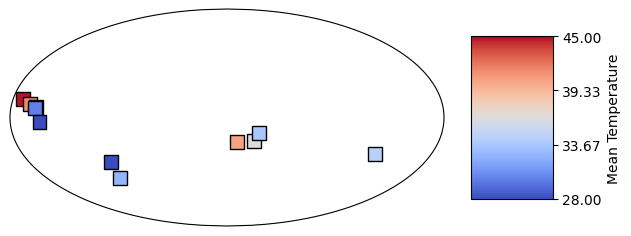

In [16]:
# Create the map and plot the reconstructed points
map_fig, map_axis, proj_plot = make_map(ccrs.Mollweide, figsize=(7, 6), grid_lines=False)

# Normalize the temperature values for the color map
norm = plt.Normalize(vmin=28, vmax=45)

# Create a scatter plot with the colormap
scatter = map_axis.scatter(temp_results['Reconstructed Longitude'].tolist(), 
                           temp_results['Reconstructed Latitude'].tolist(), 
                           c=temp_results['Mean Temperature'].tolist(),
                           cmap='coolwarm',  # Choose a colormap
                           norm=norm,
                           transform=ccrs.PlateCarree(), 
                           marker='s', 
                           edgecolor='black', 
                           s=100)  # Size of the markers

# Add a color bar
cbar = plt.colorbar(scatter, ax=map_axis, orientation='vertical', pad=0.05, aspect=2)
cbar.set_label('Mean Temperature')
cbar.set_ticks(np.linspace(28, 45, num=4))

plt.show()

In [17]:
def make_arc_suture_temp_map(t, temp_results, plot_ophiolites=False, legend=True):
    map_fig, map_axis, proj_plot = make_map(ccrs.Mollweide, figsize=(7, 6), grid_lines=False)

    ceed_modified_land_reconstruction = output_folder + '/land-modified-' + str(t) + '.shp'
    pygplates.reconstruct(ceed_modified_land_path, modified_rot_path, ceed_modified_land_reconstruction, t, 1)
    paleogeo_land = gpd.read_file(ceed_modified_land_reconstruction)
    paleogeo_land = paleogeo_land.to_crs(proj_plot)

    highlands_reconstruction = output_folder + '/highlands.shp'
    pygplates.reconstruct(highlands_path, modified_rot_path, highlands_reconstruction, t, 1)
    highlands = gpd.read_file(highlands_reconstruction)
    highlands = highlands.to_crs(proj_plot)

    arcs_reconstruction = output_folder + '/arcs.shp'
    pygplates.reconstruct(arcs_path, modified_rot_path, arcs_reconstruction, t, 1)
    arcs = gpd.read_file(arcs_reconstruction)
    arcs = arcs.to_crs(proj_plot)

    sutures_reconstruction = output_folder + '/sutures.shp'
    pygplates.reconstruct(sutures_path, modified_rot_path, sutures_reconstruction, t, 1)
    sutures = gpd.read_file(sutures_reconstruction)
    sutures = sutures.to_crs(proj_plot)

    paleogeo_land.plot(ax=map_axis, linewidth=1, facecolor=land_color, edgecolor=None)
    # highlands.plot(ax=map_axis, linewidth=1, color=highlands_color, edgecolor=None)
    arcs.plot(ax=map_axis, linewidth=4, color=arcs_color, edgecolor=arcs_color)
    sutures.plot(ax=map_axis, linewidth=4, color=sutures_color, edgecolor=sutures_color)
    
    if plot_ophiolites:
        ophiolites_reconstruction = output_folder + '/ophiolites.shp'
        pygplates.reconstruct(ophiolites_path, modified_rot_path, ophiolites_reconstruction, t, 1)
        ophiolites = gpd.read_file(ophiolites_reconstruction)
        ophiolites = ophiolites.to_crs(proj_plot)

        ophiolites['Suture_Int'] = ophiolites['Suture'].apply(lambda x: int(x) if pd.notna(x) else pd.NA)
        ophiolites['Suture_Int'] = ophiolites['Suture_Int'].astype('Int64')
        sutures['ID_int'] = sutures['ID'].astype(int)
        sutures_filtered = sutures[(sutures['EXMAX']>t) & (sutures['EXMIN']<t)]

        ophiolites_filtered = ophiolites[ophiolites['Suture_Int'].isin(sutures_filtered['ID_int'])]
        ophiolites_filtered.plot(ax=map_axis, linewidth=0.1, marker='s', markersize=8, color=ophiolites_color, 
                                edgecolor='black', zorder=100)    
    map_axis.set_facecolor(water_color)

    map_axis.set_title(f'{t} Ma', fontsize=16, pad=0)
    
    temp_results_filtered = temp_results[temp_results['Age'] == t]
    # Normalize the temperature values for the color map
    norm = plt.Normalize(vmin=28, vmax=44)
    
    # Define size bins and thresholds
    size_bins = [50, 100, 200, 300]
    thresholds = [10, 40, 100]

    # Function to map count values to marker sizes
    def map_count_to_size(count):
        if count <= thresholds[0]:
            return size_bins[0]
        elif count <= thresholds[1]:
            return size_bins[1]
        elif count <= thresholds[2]:
            return size_bins[2]
        else:
            return size_bins[3]
        
    sizes = [map_count_to_size(count) for count in temp_results_filtered['Count']]

# Create a scatter plot with the colormap
    scatter = map_axis.scatter(temp_results_filtered['Reconstructed Longitude'].tolist(), 
                                temp_results_filtered['Reconstructed Latitude'].tolist(), 
                                c=temp_results_filtered['Mean Temperature'].tolist(),
                                cmap='coolwarm',  # Choose a colormap
                                norm=norm,
                                transform=ccrs.PlateCarree(), 
                                marker='o', 
                                edgecolor='black', 
                                s=sizes,
                                zorder=101)  # Size of the markers
    
    if legend==True:
        # Create a new axis below the main plot for the colorbar and legend
        fig = map_axis.get_figure()
        cbar_axis = fig.add_axes([0.4, 0.09, 0.5, 0.03])
        cbar = plt.colorbar(scatter, cax=cbar_axis, orientation='horizontal')
        cbar.set_label('mean temperature (ºC)')
        cbar.set_ticks(np.linspace(28, 44, num=5))

        temp_labels = [
        r'$\delta^{18}\mathrm{O}$ conodont <= {thresholds[0]}',
        f'{thresholds[0]} < Count <= {thresholds[1]}',
        f'{thresholds[1]} < Count <= {thresholds[2]}',
        f'Count > {thresholds[2]}']
        
        temp_labels = [
        r'$\delta^{18}\mathrm{O}$ conodont (' + str(4) + ' to ' + str(thresholds[0]) + ')',
        r'$\delta^{18}\mathrm{O}$ conodont (' + str(thresholds[0]) + ' to ' + str(thresholds[1]) + ')',
        r'$\delta^{18}\mathrm{O}$ conodont (' + str(thresholds[1]) + ' to ' + str(thresholds[2]) + ')',
        r'$\delta^{18}\mathrm{O}$ conodont (> ' + str(thresholds[2]) + ')'
        ]
        
        legend_handles = [
            Line2D([0], [0], color=arcs_color, lw=4, label='continental arcs'),
            Line2D([0], [0], color=sutures_color, lw=4, label='arc-continent sutures'),
            Line2D([0], [0], color=ophiolites_color, marker='s', lw=0, markersize=8, markeredgecolor='black', label='ophiolites'),
            Line2D([0], [0], marker='o', lw=0, color='black', label=temp_labels[0], markerfacecolor='white', markersize=np.sqrt(size_bins[0])),
            Line2D([0], [0], marker='o', lw=0, color='black', label=temp_labels[1], markerfacecolor='white', markersize=np.sqrt(size_bins[1])),
            Line2D([0], [0], marker='o', lw=0, color='black', label=temp_labels[2], markerfacecolor='white', markersize=np.sqrt(size_bins[2])),
            Line2D([0], [0], marker='o', lw=0, color='black', label=temp_labels[3], markerfacecolor='white', markersize=np.sqrt(size_bins[3]))
            ]
        
        legend_axis = fig.add_axes([0.15, 0.15, 0.7, 0.03])
        legend_axis.axis('off')  # Hide the axis
        legend_axis.legend(handles=legend_handles, loc='center', ncol=3, frameon=False)

    return map_fig, map_axis, proj_plot

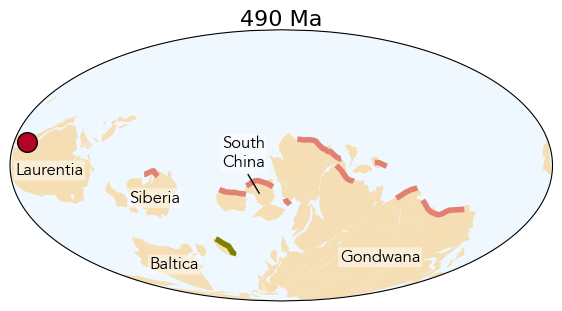

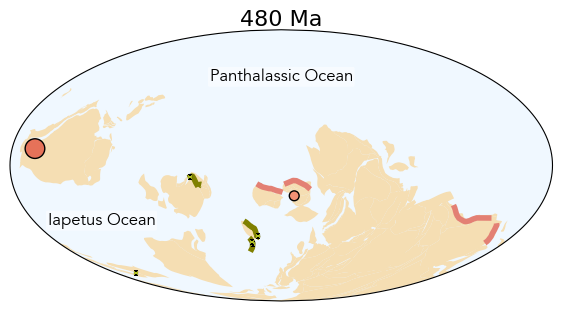

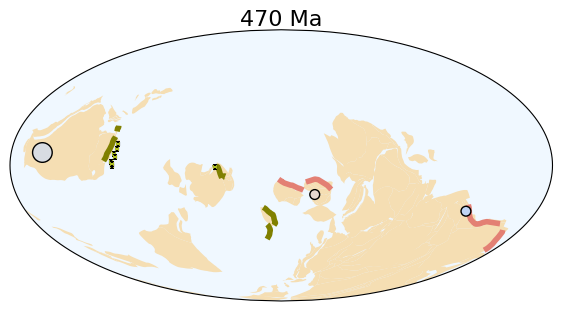

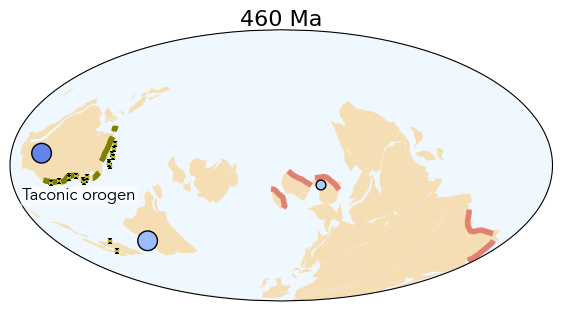

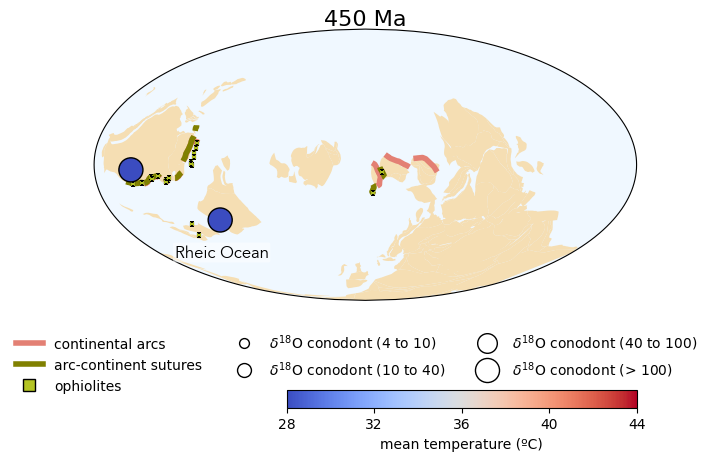

In [18]:
font_properties = {
    'fontname': 'Avenir',
    'fontsize': 12
}

t = 490
map_fig, map_axis, proj_plot = make_arc_suture_temp_map(t, temp_results, plot_ophiolites=True, legend=False)  
map_axis.text(55, -55, 'Gondwana', transform=ccrs.Geodetic(), fontname='Avenir', fontsize=12, 
              bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle="round,pad=0.1"))
map_axis.text(-177, -5, 'Laurentia', transform=ccrs.Geodetic(),  fontname='Avenir', fontsize=12, 
              bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle="round,pad=0.1"))
map_axis.text(-135, -60, 'Baltica', transform=ccrs.Geodetic(),  fontname='Avenir', fontsize=12, 
              bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle="round,pad=0.1"))
map_axis.text(-105, -20, 'Siberia', transform=ccrs.Geodetic(),  fontname='Avenir', fontsize=12, 
              bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle="round,pad=0.1"))
map_axis.text(-25, -3, 'South\nChina', transform=ccrs.Geodetic(),  fontname='Avenir', fontsize=12, 
              bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle="round,pad=0.1"), ha='center', va='bottom')
map_axis.plot([-22, -15], [-5, -15], transform=ccrs.Geodetic(), color='black',linewidth=1)
plt.savefig('../Figures/paleogeo_temp_' + str(t) + '_mollweide.pdf', bbox_inches='tight', transparent=True)

t = 480
map_fig, map_axis, proj_plot = make_arc_suture_temp_map(t,temp_results, plot_ophiolites=True, legend=False)    
map_axis.text(0, 45, 'Panthalassic Ocean', transform=ccrs.Geodetic(),  fontdict=font_properties,
              bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle="round,pad=0.1"), ha='center', va='bottom')
map_axis.text(-135, -35, 'Iapetus Ocean', transform=ccrs.Geodetic(),  fontdict=font_properties,
              bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle="round,pad=0.1"), ha='center', va='bottom')
plt.savefig('../Figures/paleogeo_temp_' + str(t) + '_mollweide.pdf', bbox_inches='tight', transparent=True)

t = 470
map_fig, map_axis, proj_plot = make_arc_suture_temp_map(t,temp_results, plot_ophiolites=True, legend=False)    
plt.savefig('../Figures/paleogeo_temp_' + str(t) + '_mollweide.pdf', bbox_inches='tight', transparent=True)

t = 460
map_fig, map_axis, proj_plot = make_arc_suture_temp_map(t,temp_results, plot_ophiolites=True, legend=False) 
map_axis.text(-140, -21, 'Taconic orogen', transform=ccrs.Geodetic(),  fontname='Avenir', fontsize=12, 
              bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle="round,pad=0.1"), ha='center', va='bottom')
plt.savefig('../Figures/paleogeo_temp_' + str(t) + '_mollweide.pdf', bbox_inches='tight', transparent=True)

t = 450
map_fig, map_axis, proj_plot = make_arc_suture_temp_map(t,temp_results, plot_ophiolites=True, legend=True)  
map_axis.text(-135, -55, 'Rheic Ocean', transform=ccrs.Geodetic(),  fontname='Avenir', fontsize=12, 
              bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', boxstyle="round,pad=0.1"), ha='center', va='bottom')  
plt.savefig('../Figures/paleogeo_temp_' + str(t) + '_mollweide.pdf', bbox_inches='tight', transparent=True)

## Plot the mean temperatures at reconstructed paleolatitudes in comparison with PhanDA

The csv files with the 5th, 16th, 50th, 84th, and 95th percentiles of PhanDA's reconstructed LTG are imported. They are then plotted with the conodont means and bootstrapped confidence intervals that are calculated above at the reconstructed paleolatitudes.

In [19]:
temp_lat_Tremadocian = pd.read_csv('https://raw.githubusercontent.com/EJJudd/PhanDA/refs/heads/main/5_Outputs/PhanDA_LTG_percentiles/PhanDA_LTG_Tremadocian.csv')
temp_lat_Floian = pd.read_csv('https://raw.githubusercontent.com/EJJudd/PhanDA/refs/heads/main/5_Outputs/PhanDA_LTG_percentiles/PhanDA_LTG_Floian.csv')
temp_lat_Dapingian = pd.read_csv('https://raw.githubusercontent.com/EJJudd/PhanDA/refs/heads/main/5_Outputs/PhanDA_LTG_percentiles/PhanDA_LTG_Dapingian.csv')
temp_lat_Darriwilian = pd.read_csv('https://raw.githubusercontent.com/EJJudd/PhanDA/refs/heads/main/5_Outputs/PhanDA_LTG_percentiles/PhanDA_LTG_Darriwilian.csv')
temp_lat_Sandbian = pd.read_csv('https://raw.githubusercontent.com/EJJudd/PhanDA/refs/heads/main/5_Outputs/PhanDA_LTG_percentiles/PhanDA_LTG_Sandbian.csv')
temp_lat_Katian = pd.read_csv('https://raw.githubusercontent.com/EJJudd/PhanDA/refs/heads/main/5_Outputs/PhanDA_LTG_percentiles/PhanDA_LTG_Katian.csv')
temp_lat_Hirnantian = pd.read_csv('https://raw.githubusercontent.com/EJJudd/PhanDA/refs/heads/main/5_Outputs/PhanDA_LTG_percentiles/PhanDA_LTG_Hirnantian.csv')
temp_lat_Darriwilian.head()

,Latitude,LTG_05,LTG_16,LTG_50,LTG_84,LTG_95
0,90.0,-0.674073,2.069930,12.555948,19.221257,22.845154
1,87.5,-0.674083,2.069926,12.555952,19.221260,22.845156
2,85.0,-0.079937,2.770532,12.898153,19.621970,23.235082
3,82.5,1.106537,3.934342,13.410194,20.213498,24.038992
4,80.0,2.597142,5.364943,13.812400,20.762809,24.674602


In [20]:
Cambrian_Tremadocian = 485.4
Tremadocioan_Floian = 477.7
Floian_Dapingian = 470.0
Dapingian_Darriwilian = 467.3
Darriwilian_Sandbian = 458.4
Sandbian_Katian = 453.0
Katian_Hirnantian = 445.2
Hirnantian_Silurian = 443.8

Tremadocian_mean_age = (Cambrian_Tremadocian + Tremadocioan_Floian) / 2
Floian_mean_age = (Tremadocioan_Floian + Floian_Dapingian) / 2
Dapingian_mean_age = (Floian_Dapingian + Dapingian_Darriwilian) / 2
Darriwilian_mean_age = (Dapingian_Darriwilian + Darriwilian_Sandbian) / 2
Sandbian_mean_age = (Darriwilian_Sandbian + Sandbian_Katian) / 2
Katian_mean_age = (Sandbian_Katian + Katian_Hirnantian) / 2
Hirnantian_mean_age = (Katian_Hirnantian + Hirnantian_Silurian) / 2

# Collect the mean ages
mean_ages = [
    Tremadocian_mean_age, 
    Floian_mean_age, 
    Dapingian_mean_age, 
    Darriwilian_mean_age, 
    Sandbian_mean_age, 
    Katian_mean_age, 
    Hirnantian_mean_age
]

# Normalize the ages to use in colormap
norm = plt.Normalize(440, 490)
cmap = plt.get_cmap('viridis')

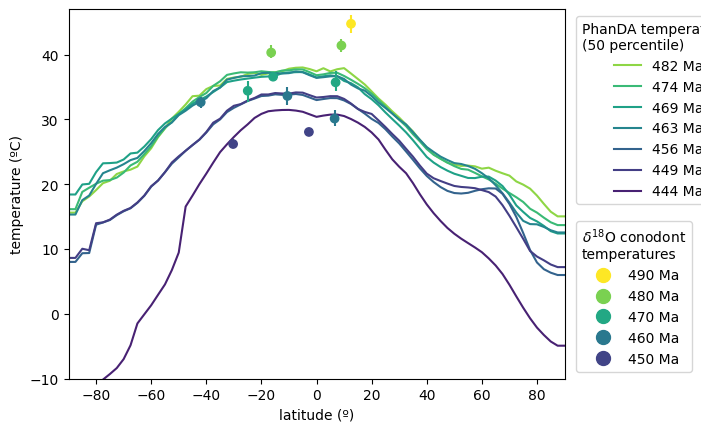

In [37]:
# Define your plots with colors based on mean ages
line1 = plt.plot(temp_lat_Tremadocian['Latitude'], temp_lat_Tremadocian['LTG_50'], 
                 color=cmap(norm(Tremadocian_mean_age)), label=f'{round(Tremadocian_mean_age)} Ma')
line2 = plt.plot(temp_lat_Floian['Latitude'], temp_lat_Floian['LTG_50'], 
                 color=cmap(norm(Floian_mean_age)), label=f'{round(Floian_mean_age)} Ma')
line3 = plt.plot(temp_lat_Dapingian['Latitude'], temp_lat_Dapingian['LTG_50'], 
                 color=cmap(norm(Dapingian_mean_age)), label=f'{round(Dapingian_mean_age)} Ma')
line4 = plt.plot(temp_lat_Darriwilian['Latitude'], temp_lat_Darriwilian['LTG_50'], 
                 color=cmap(norm(Darriwilian_mean_age)), label=f'{round(Darriwilian_mean_age)} Ma')
line5 = plt.plot(temp_lat_Sandbian['Latitude'], temp_lat_Sandbian['LTG_50'], 
                 color=cmap(norm(Sandbian_mean_age)), label=f'{round(Sandbian_mean_age)} Ma')
line6 = plt.plot(temp_lat_Katian['Latitude'], temp_lat_Katian['LTG_50'], 
                 color=cmap(norm(Katian_mean_age)), label=f'{round(Katian_mean_age)} Ma')
line7 = plt.plot(temp_lat_Hirnantian['Latitude'], temp_lat_Hirnantian['LTG_50'], 
                 color=cmap(norm(Hirnantian_mean_age)), label=f'{round(Hirnantian_mean_age)} Ma')

# Create the first legend for the plot lines
first_legend = plt.legend(title="PhanDA temperatures\n(50 percentile)", loc='upper left', bbox_to_anchor=(1.01, 1))

for i in range(len(temp_results)):
    # Get the current latitude, mean temperature, lower CI, upper CI, and age for coloring
    latitude = temp_results['Reconstructed Latitude'].iloc[i]
    mean_temp = temp_results['Mean Temperature'].iloc[i]
    lower_error = mean_temp - temp_results['Temperature lower CI'].iloc[i]
    upper_error = temp_results['Temperature upper CI'].iloc[i] - mean_temp
    age = temp_results['Age'].iloc[i]

    # Plot the error bar with the same color as the scatter point
    plt.errorbar(
        latitude, mean_temp,
        yerr=[[lower_error], [upper_error]],
        fmt='None',
        color=cmap(norm(age)),  # Color based on age
        ecolor=cmap(norm(age)),  # Color error bars based on age
        capsize=0,
        zorder=100
    )

# Plot scatter data with its own label
scatter = plt.scatter(temp_results['Reconstructed Latitude'], temp_results['Mean Temperature'], 
                      c=temp_results['Age'], cmap=cmap, norm=norm, 
                      label='$\delta^{18}\mathrm{O}$ conodont temperatures', zorder=101)

# Create unique values for ages and corresponding colors from the scatter plot
unique_ages = np.unique(temp_results['Age'])
colors = cmap(norm(unique_ages))

# Flip the order of unique ages and colors for the legend
unique_ages = unique_ages[::-1]
colors = colors[::-1]

# Create custom legend handles for the unique ages as circles
handles = [mlines.Line2D([], [], color=colors[i], marker='o', linestyle='None', 
                         markersize=10, label=f'{int(unique_ages[i])} Ma') for i in range(len(unique_ages))]

# Add the second legend for the scatter plot with age labels
second_legend = plt.legend(handles=handles, title="$\delta^{18}\mathrm{O}$ conodont\ntemperatures", loc='lower left', bbox_to_anchor=(1.01, 0))

# Add the first legend back to the plot (after creating the second legend)
plt.gca().add_artist(first_legend)

plt.xlim(-90, 90)
plt.ylim(-10, 47)
plt.ylabel('temperature (ºC)')
plt.xlabel('latitude (º)')
plt.savefig('../Figures/PhanDA_temp_lat_50.pdf', bbox_inches='tight', transparent=True)
plt.show()

Text(0.5, 0, 'latitude (º)')

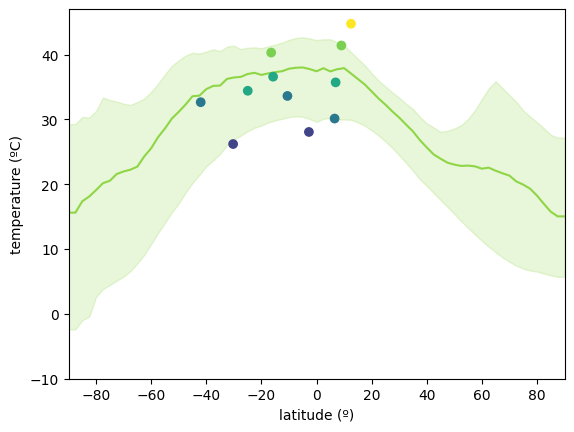

In [34]:
# Plot the mean, 95th, and 5th percentile lines
plt.plot(temp_lat_Tremadocian['Latitude'], temp_lat_Tremadocian['LTG_50'], 
                 color=cmap(norm(Tremadocian_mean_age)), label=f'{round(Tremadocian_mean_age)} Ma')

# Fill the area between the 95th and 5th percentile lines
plt.fill_between(temp_lat_Tremadocian['Latitude'], 
                 temp_lat_Tremadocian['LTG_95'], temp_lat_Tremadocian['LTG_05'], 
                 color=cmap(norm(Tremadocian_mean_age)), alpha=0.2, label='95% CI')

plt.scatter(temp_results['Reconstructed Latitude'], temp_results['Mean Temperature'], 
                      c=temp_results['Age'], cmap=cmap, norm=norm, 
                      label='$\delta^{18}\mathrm{O}$ conodont temperatures', zorder=101)

plt.xlim(-90, 90)
plt.ylim(-10, 47)
plt.ylabel('temperature (ºC)')
plt.xlabel('latitude (º)')